In [1]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:0.1% !important;height:0.1% !important;</style>"
HTML( style )

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"

In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 100% !important; height: 100% !important;} </style>" 

In [4]:
titanic_data = pd.read_csv("C:\\учеба\\Программирование\\DtaScience Stepik\\ТИТАНИК\\Titanic.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отберем очевидные переменные. 
В X положили нужные коллонки

В Y то, что будем предсказывать 

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived 

Изменение переменных, которые записаны в строках

In [8]:
X = pd.get_dummies(X)
X['Sex_female'] = X['Sex_female'].astype(int)
X['Sex_male'] = X['Sex_male'].astype(int)
X['Embarked_C'] = X['Embarked_C'].astype(int)
X['Embarked_Q'] = X['Embarked_Q'].astype(int)
X['Embarked_S'] = X['Embarked_S'].astype(int)

In [9]:
X = X.fillna({'Age' : X.Age.median()})

In [10]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
X.head()    

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [13]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Оверфиттинг 

[Text(0.6212286931818182, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.3958664772727273, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.5085475852272727, 0.95, 'True  '),
 Text(0.19946022727272728, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.08181818181818182, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.07454545454545454, 0.775, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.06727272727272728, 0.725, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07454545454545454, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08181818181818182, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.0890909090909091, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3171022727272727, 0.825, 'Embarked

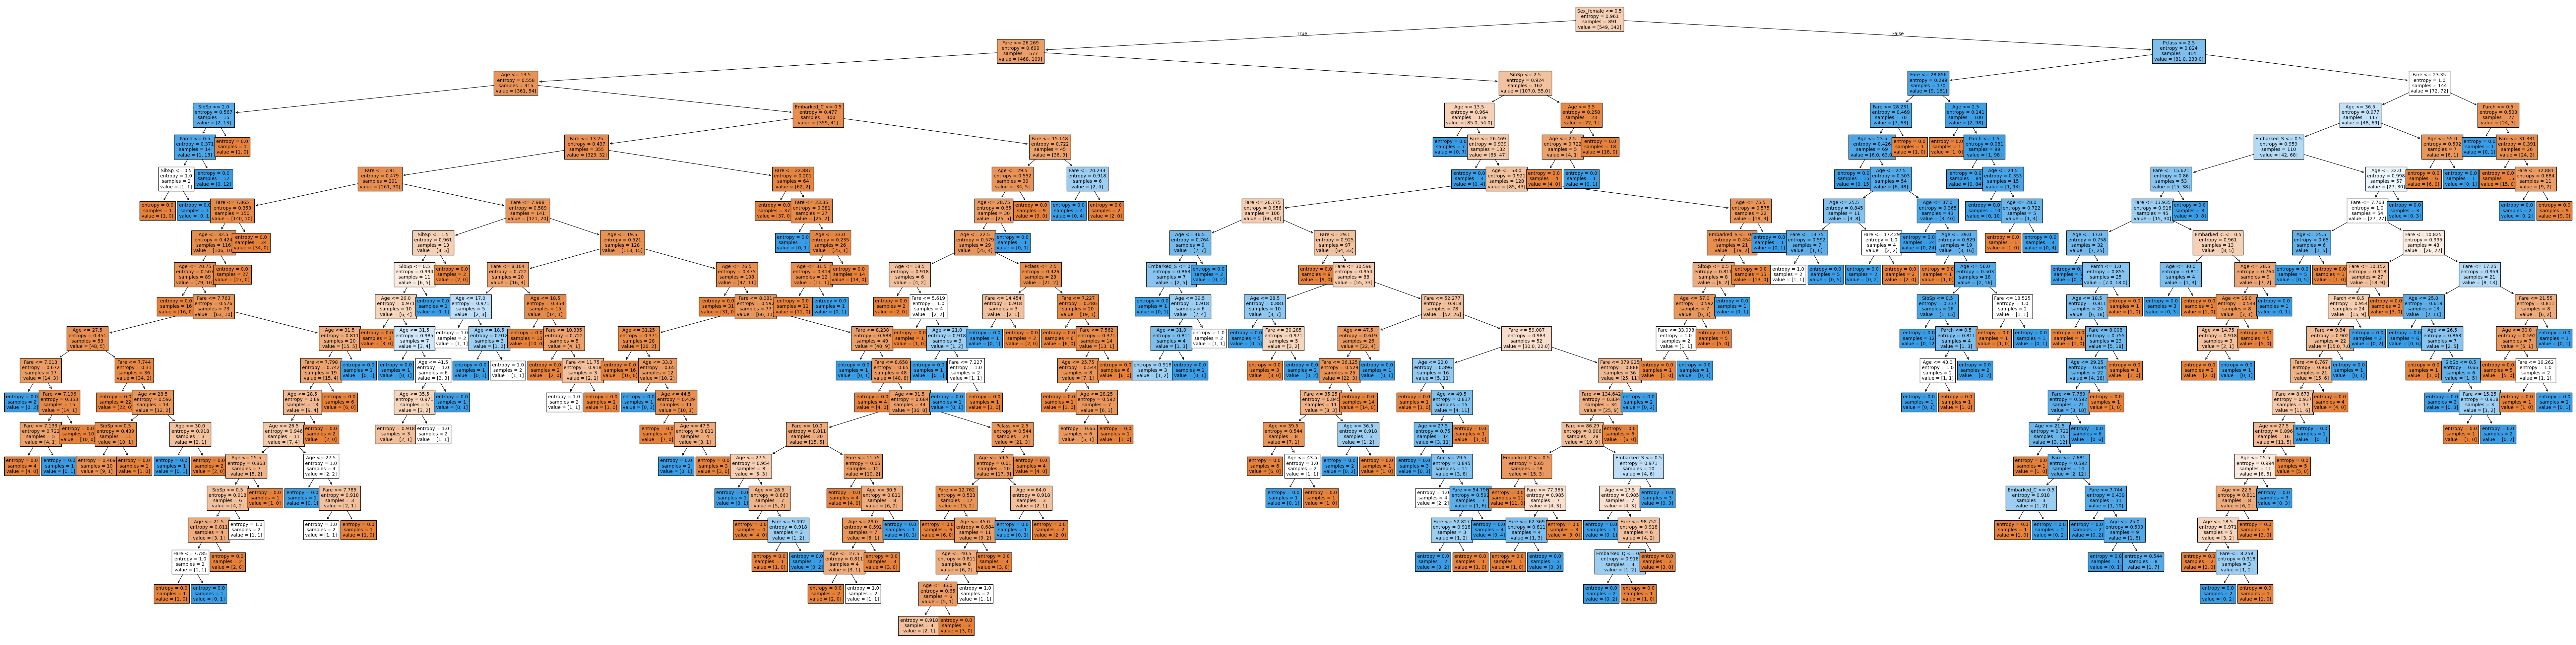

In [15]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [18]:
X_train.shape

(596, 10)

In [19]:
X_test.shape

(295, 10)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Сравниваем насколько хорошо наше дерево предсказывает ответы на train и test

Предсказываем число правильных ответов

In [22]:
clf.score(X, y)

0.9797979797979798

In [23]:
clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 3)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.score(X_train, y_train)

0.8238255033557047

Обучаем 99 деревьев. для кажого из них предсказал события и сохранил точность классификации

In [38]:
scores_data = pd.DataFrame()

In [40]:
max_depth_values = range (1,100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])
    
 

In [44]:
scores_data.head()


,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [50]:
scores_data_long.query("set_type == 'cross_val_score' ").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.802059
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.803725
207,10,cross_val_score,0.802031


<Axes: xlabel='max_depth', ylabel='score'>

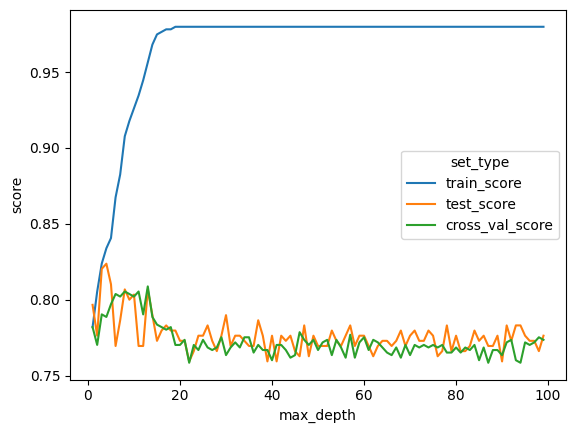

In [46]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score', 'cross_val_score'], 
                           var_name = 'set_type', 
                           value_name = 'score',)

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

анализ графика:
train score:
- растет с увеличением глубины дерева
- что не всегда ведет к нахождению общих закономерностей в исследуемых данных

test score:
- изначально невелик (модель еще не доучилась)
- на промежутке 3-5 score максимален (оптимальное состояние: закономерность с изученных данных переносится на новые)
- с дальнейшим увеличением глубины test score начинает падать (переход от недообученности к переобученности)

In [30]:
from sklearn.model_selection import GridSearchCV

parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
clf=tree.DecisionTreeClassifier()
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [31]:
parameters={'criterion':['gini', 'entropy'], 'max_depth':range(1, 150)}
grid_search_cv_clf=GridSearchCV(clf, parameters, cv=100)

In [32]:
from sklearn.model_selection import cross_val_score

In [34]:
clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 4)

In [37]:
cross_val_score(clf, X_train, y_train, cv=5).mean()
#это средняя точность на кроссвалидации

0.7886274509803922

In [47]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7966101694915254

задание 2.4

In [51]:
tren = pd.read_csv("C:\\учеба\\Программирование\\DtaScience Stepik\\dogs_n_cats.csv")

In [52]:
tren.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [53]:
df = pd.DataFrame(tren)

In [59]:
print(df.head())

   Длина  Высота  Шерстист  Гавкает  Лазает по деревьям      Вид
0     15    18.0         1        1                   0  собачка
1     20    24.0         1        0                   0  собачка
2     34    40.8         1        1                   0  собачка
3     26    31.2         1        1                   0  собачка
4     16    19.2         1        1                   0  собачка


In [ ]:
temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})

In [124]:
dogs_n_cats_train


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [ ]:
# Загрузка данных
dogs_n_cats_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
dogs_n_cats_test = pd.read_json("C:\\Users\\shcha\\Downloads\\dataset_209691_15 (9).txt")  # Заменить на ваш файл и путь к нему

# Создание выборок
X_train = dogs_n_cats_train.drop(['Вид'], axis=1)
y_train = dogs_n_cats_train['Вид']

# Объявление модели
clf = DecisionTreeClassifier()
# Обучение модели на тренировочных данных
clf.fit(X_train, y_train)

# Предсказание на тестовых данных с записью результатов в pd.Series с названием колонки 'Вид'
y_pred = pd.Series(clf.predict(dogs_n_cats_test), name='Вид')

# Подсчет значений в предсказанных данных
y_pred.value_counts()

Вид
собачка    58
котик      42
Name: count, dtype: int64